<a href="https://colab.research.google.com/github/wolfram3002/Atomic_Heart/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [ ]:
# Загрузка набора данных
df = pd.read_csv('/content/heart.csv')

In [ ]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [ ]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: AGE_50
колонка: MD_50
колонка: SBP_50
колонка: DBP_50
колонка: HT_50
колонка: WT_50
колонка: CHOL_50
колонка: SES
колонка: CL_STATUS
колонка: MD_62
колонка: SBP_62
колонка: DBP_62
колонка: CHOL_62
колонка: WT_62
колонка: IHD_DX
колонка: DEATH


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
 15  DEATH      200 non-null    int64
dtypes: int64(16)
memory usage: 25.1 KB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [ ]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'WT_50'] = np.nan

In [ ]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        5
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.WT_50 = df_median.WT_50.fillna(df_median.WT_50.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [ ]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.WT_50 = df_mean.WT_50.fillna(df_median.WT_50.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная is_big_weight -> которая была преобразована из WT_50 (если вес >= 165, то вес считается больше среднего)```

In [ ]:
df['is_big_weight'] = np.where(df['WT_50'] >= 165, 1, 0).astype(int)

In [ ]:
df.columns

Index(['AGE_50', 'MD_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50',
       'SES', 'CL_STATUS', 'MD_62', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62',
       'IHD_DX', 'DEATH', 'is_big_weight'],
      dtype='object')

In [ ]:
Y = df['is_big_weight'] # выбираем целевую переменную (категориальную)
X = df.drop('is_big_weight', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('WT_50', axis=1)
X = X.drop('WT_62', axis=1)

5. **Графический анализ**

In [ ]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,IHD_DX,DEATH
0,42,1,110,65,64,291,2,8,4,120,78,271,2,1
1,53,1,130,72,69,278,1,6,2,122,68,250,9,1
2,53,2,120,90,70,342,4,8,1,132,90,304,2,1
3,48,4,120,80,72,239,4,8,2,118,68,209,3,1
4,53,3,118,74,66,243,3,8,5,118,56,261,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,300,2,8,1,115,65,273,0,0
196,23,1,110,70,69,120,3,8,2,112,76,198,0,0
197,20,3,130,80,66,210,5,0,1,130,85,274,0,0
198,46,3,140,84,66,130,4,6,2,148,88,160,0,0


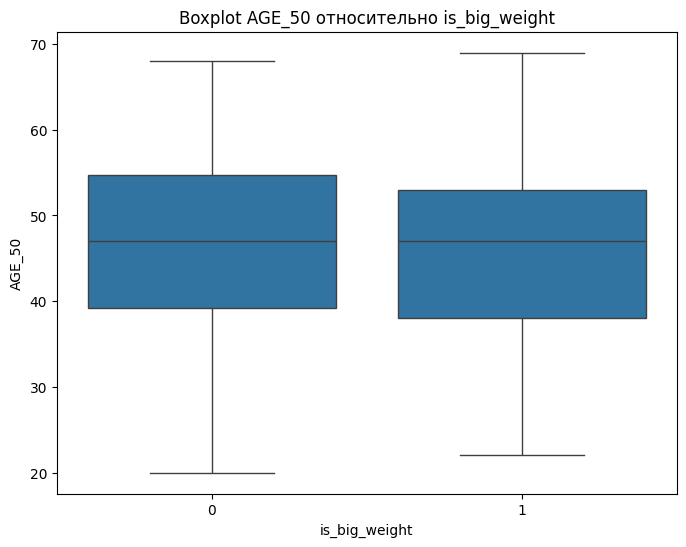

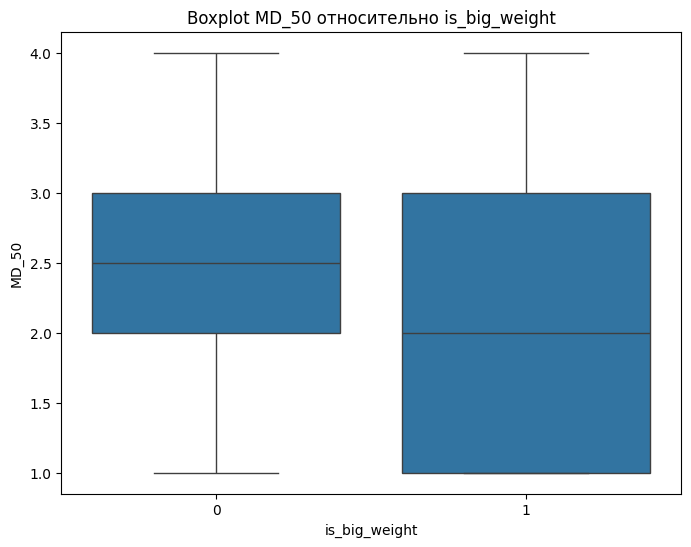

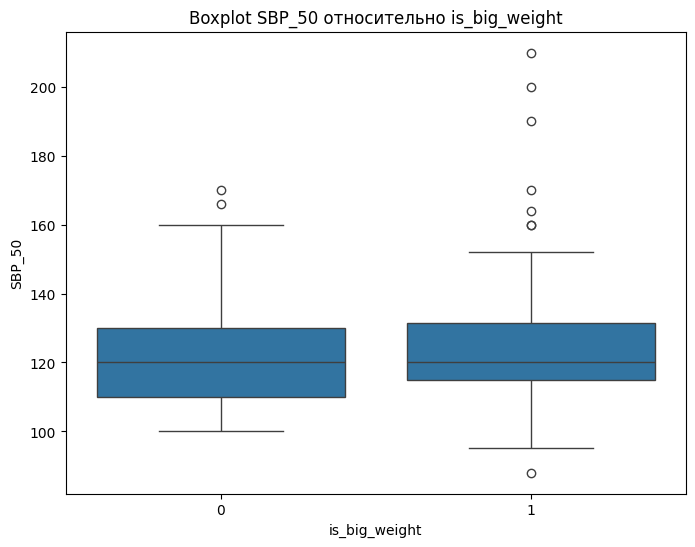

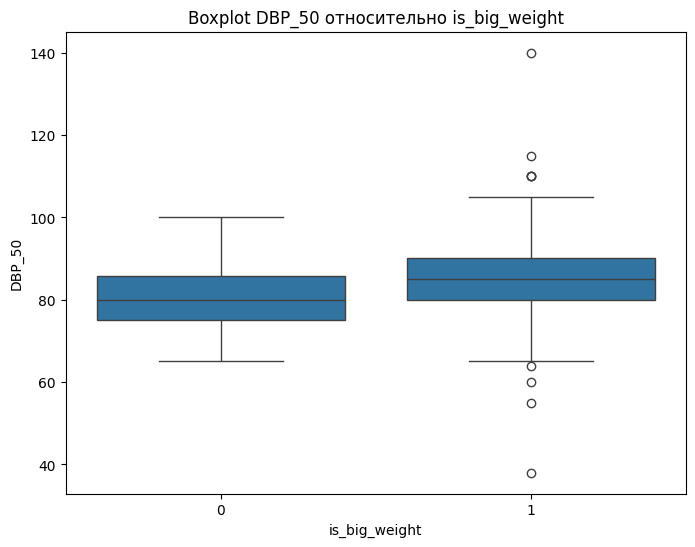

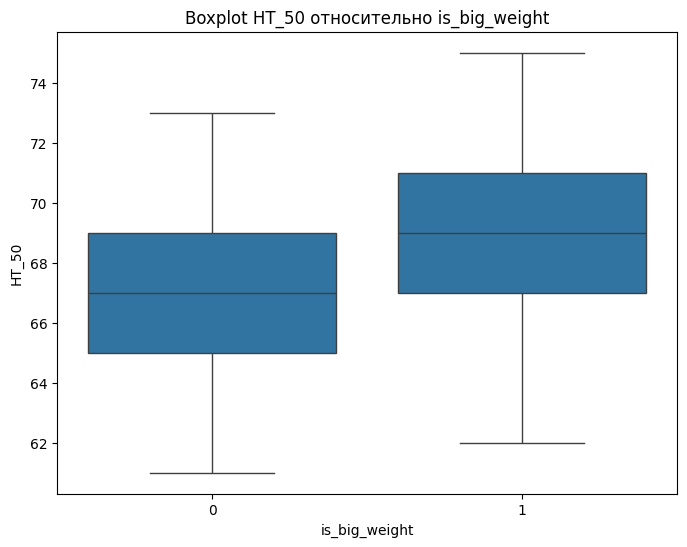

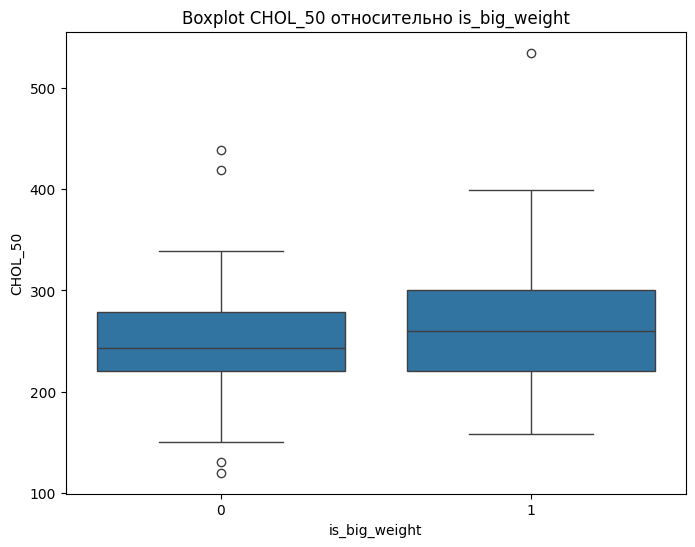

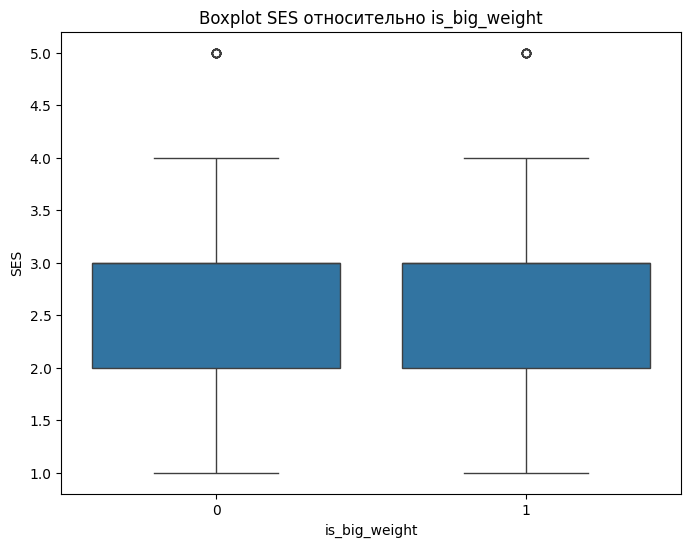

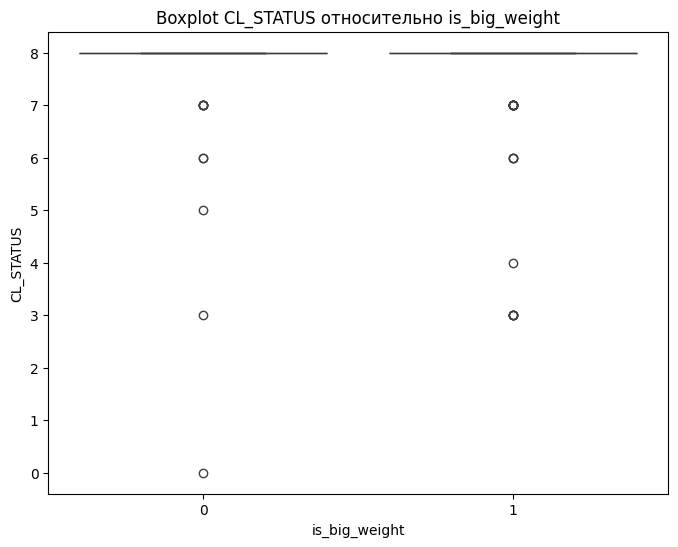

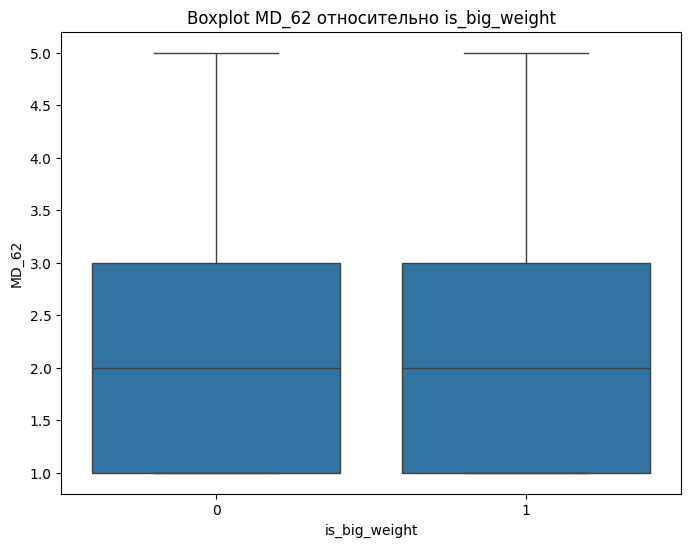

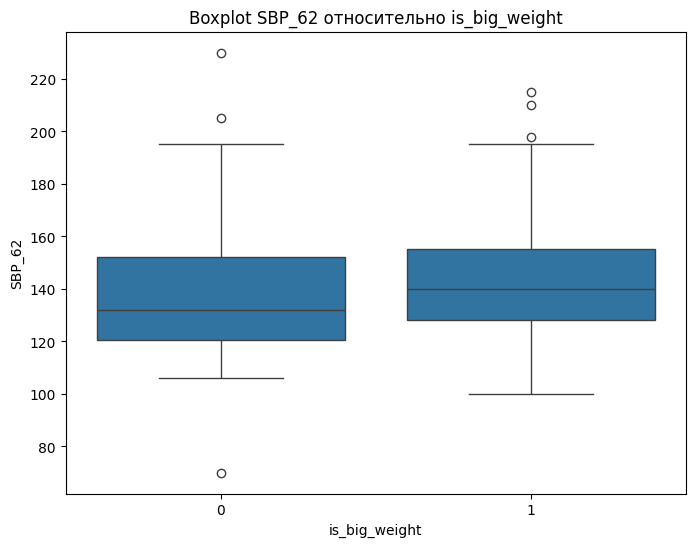

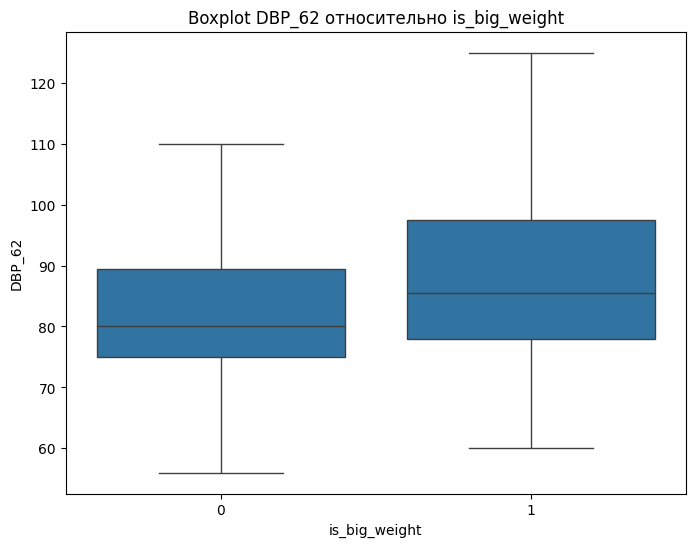

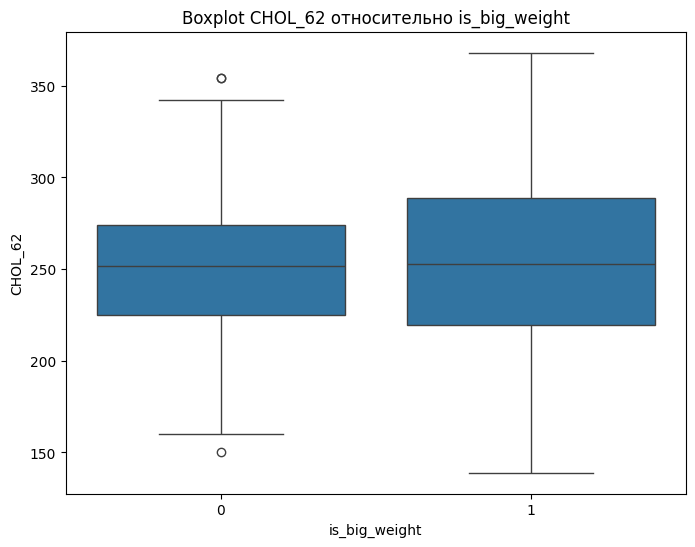

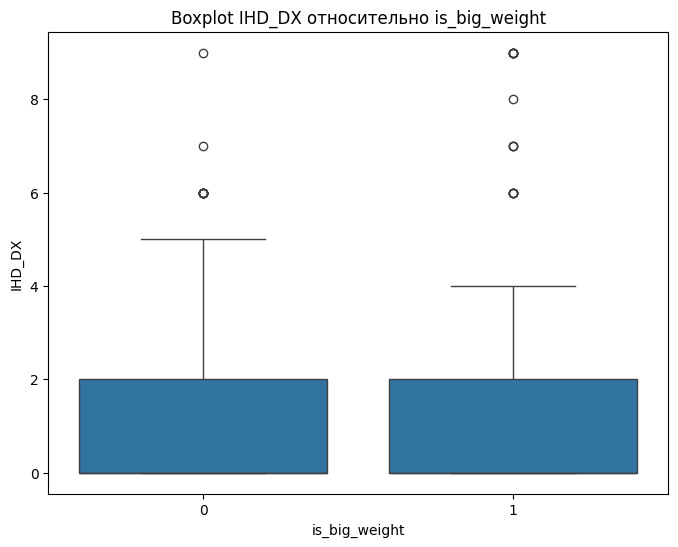

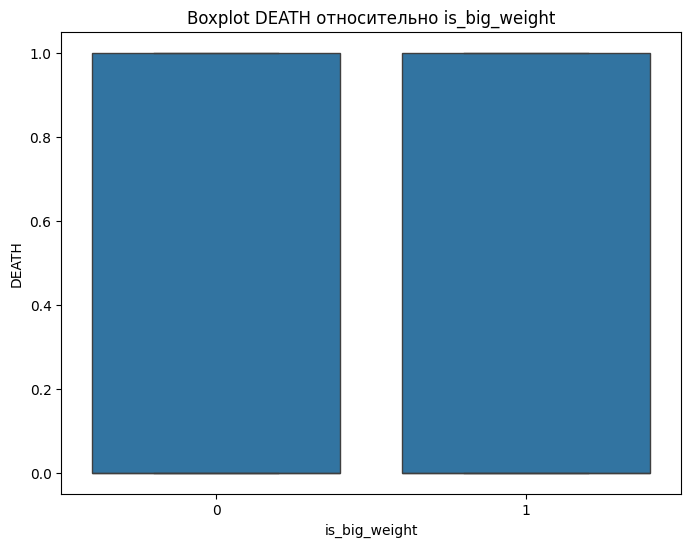

In [ ]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_big_weight', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_big_weight')
    plt.show()

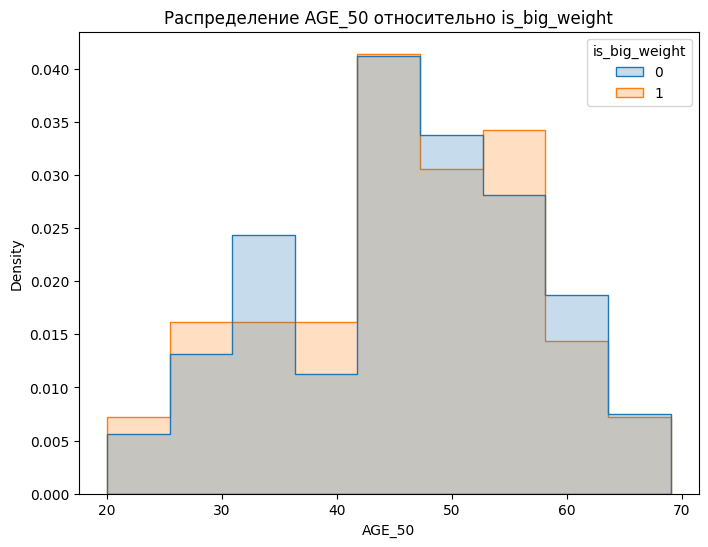

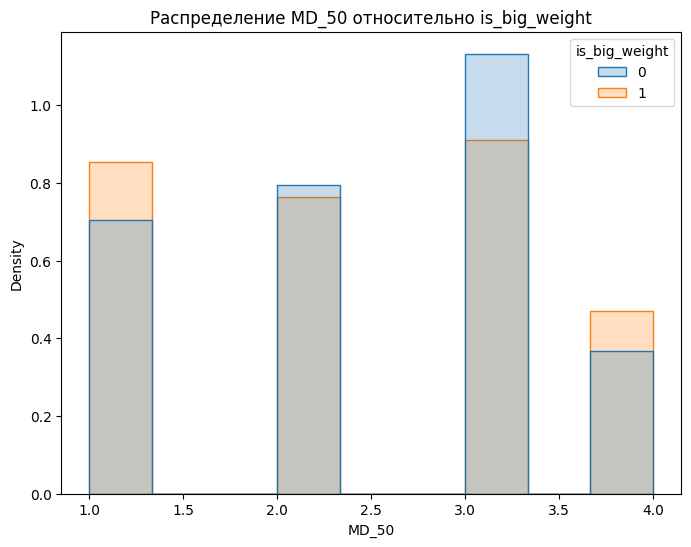

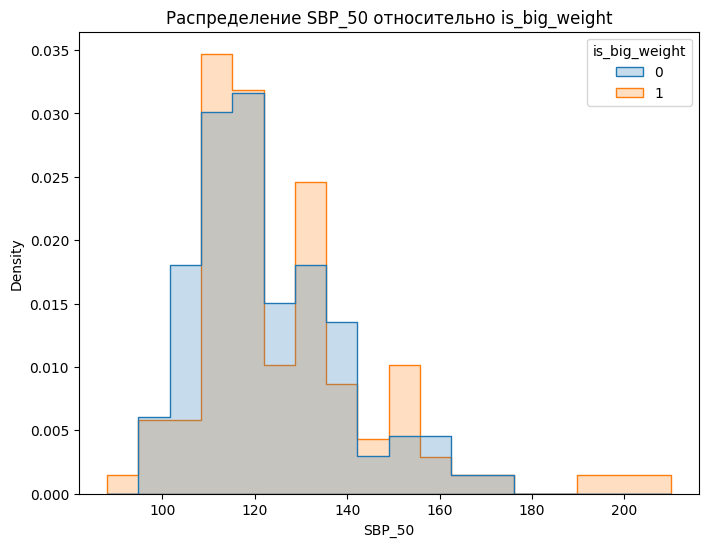

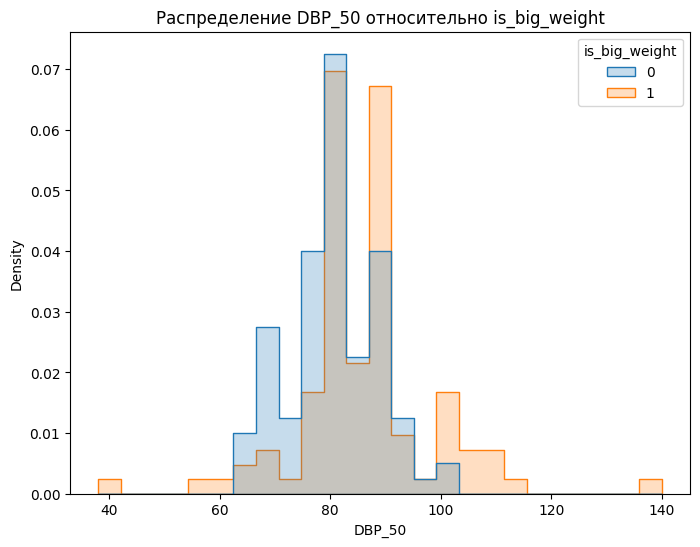

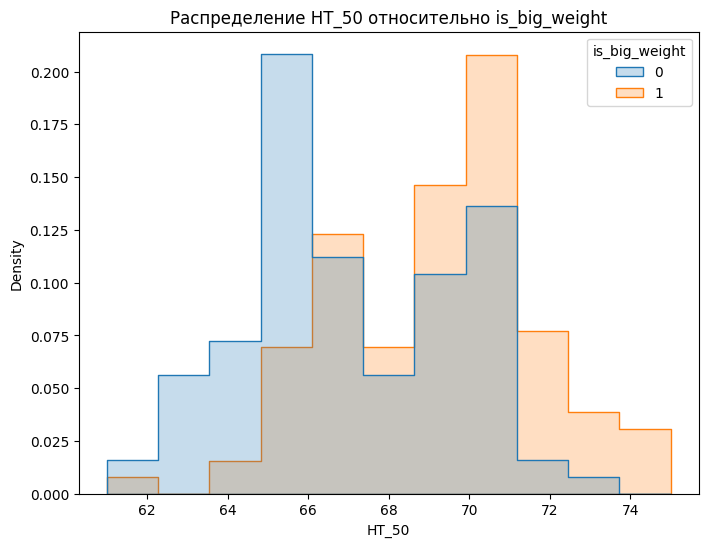

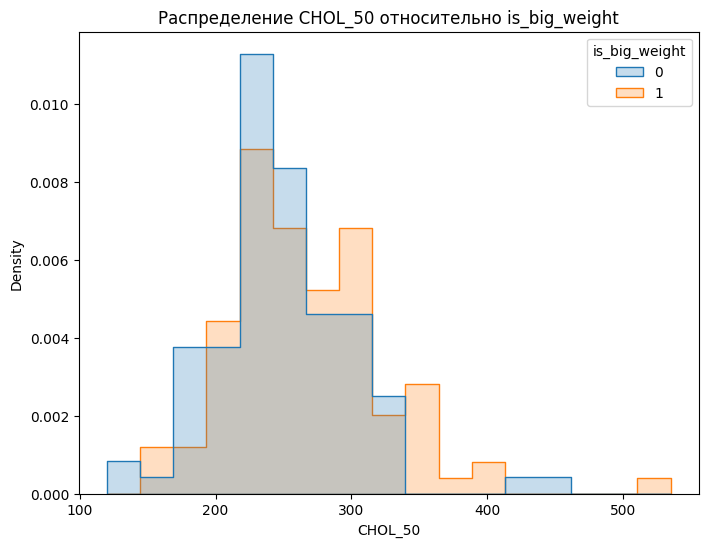

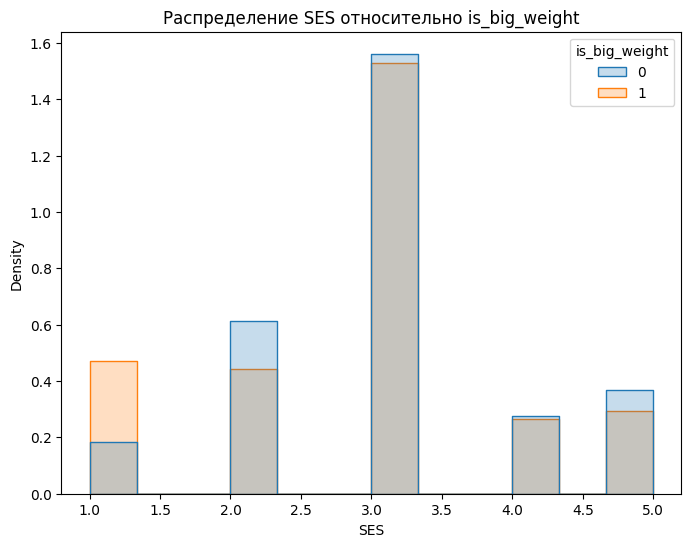

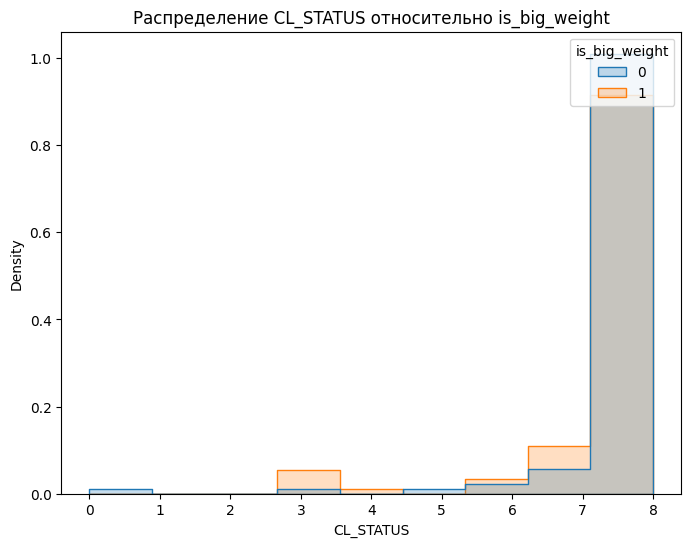

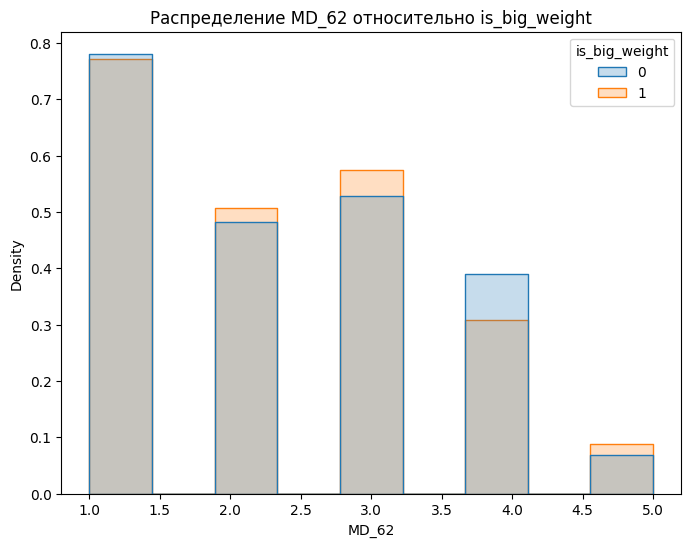

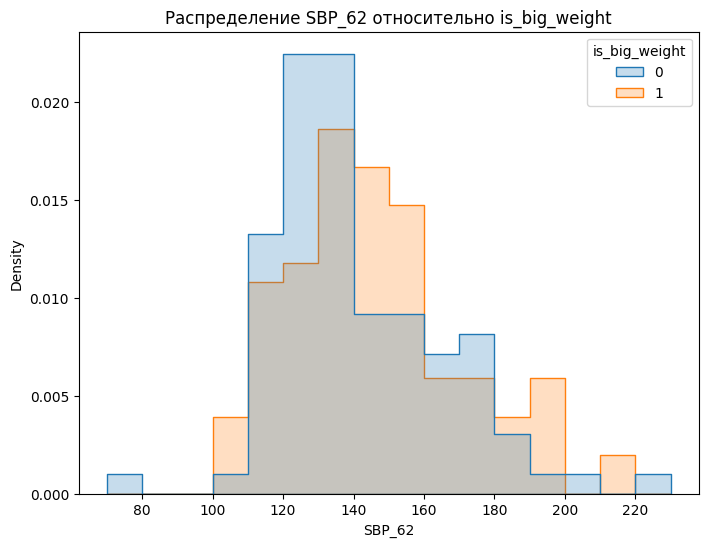

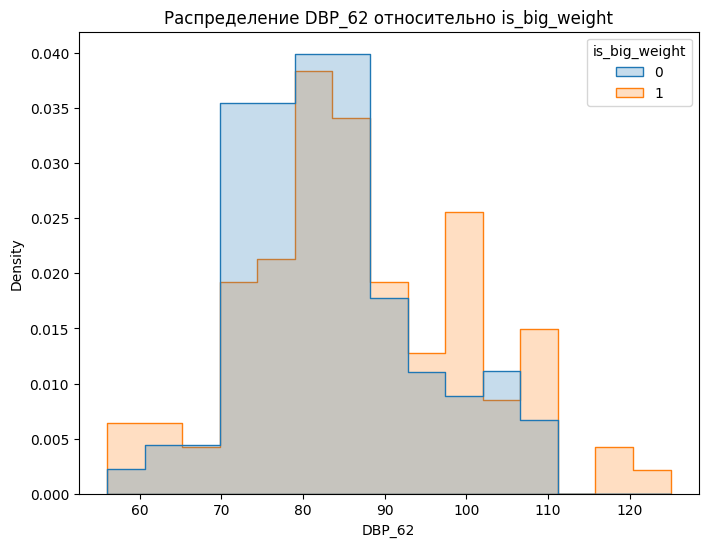

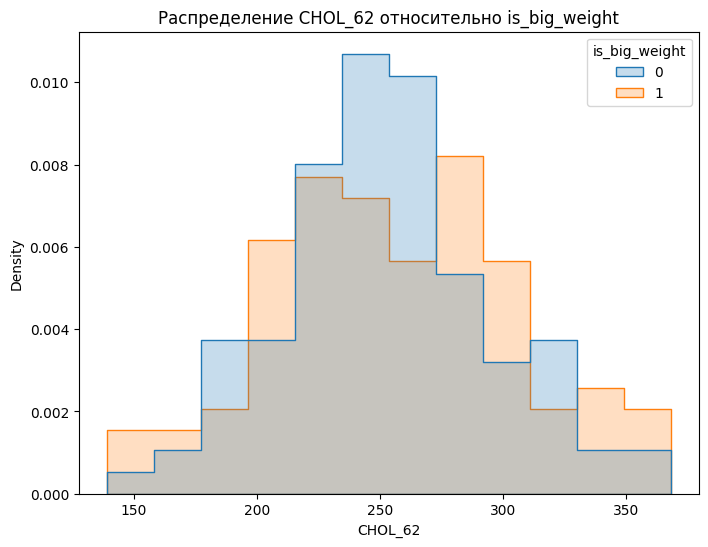

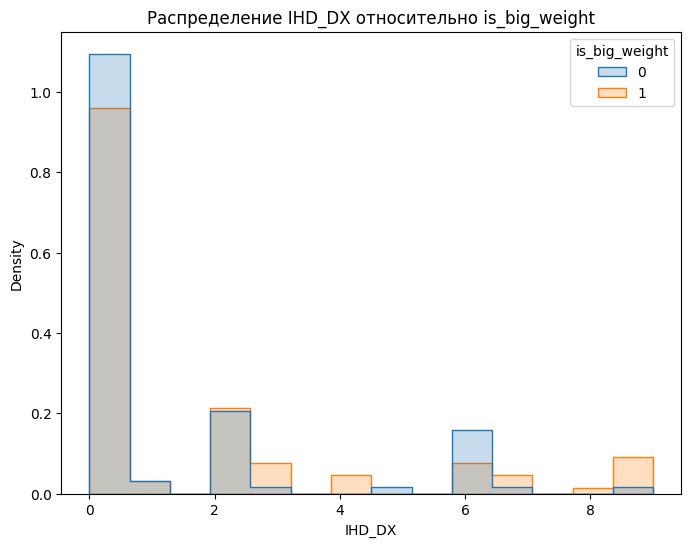

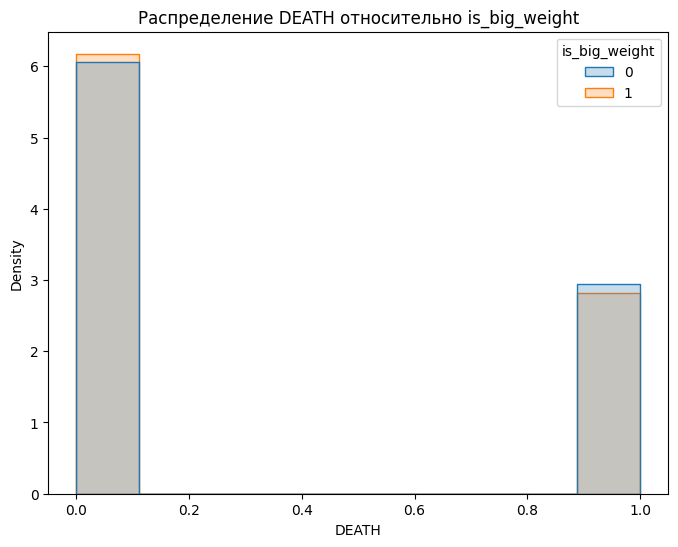

In [ ]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_big_weight', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_big_weight')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y

Можно увидеть как в первом графике вес и возраст хорошо показывают их отношения. Люди, у которых вес больше 165 фунтов, чаще варьируются в возрасте от 40 до 60, а люди, у которых вес меньше 165 фунтов, чаще варьируются в возрасте от 30 до 50, инога доходит и до 60.

In [ ]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_big_weight')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
categorial = df.select_dtypes(include=['object']).columns
if len(categorial) > 0:
  desc_stats_categorical = df.groupby('is_big_weight')[categorial].describe()
else:
  desc_stats_categorical = "Нет категориальных переменных."


### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [ ]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_big_weight')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для AGE_50:

               count       mean        std   min    25%   50%    75%   max
is_big_weight                                                             
0               98.0  46.326531  10.840717  20.0  39.25  47.0  54.75  68.0
1              102.0  45.813725  10.833328  22.0  38.00  47.0  53.00  69.0


Описательная статистика для MD_50:

               count      mean       std  min  25%  50%  75%  max
is_big_weight                                                    
0               98.0  2.387755  0.980560  1.0  2.0  2.5  3.0  4.0
1              102.0  2.333333  1.056178  1.0  1.0  2.0  3.0  4.0


Описательная статистика для SBP_50:

               count        mean        std    min    25%    50%    75%    max
is_big_weight                                                                 
0               98.0  122.846939  15.582406  100.0  110.0  120.0  130.0  170.0
1              102.0  126.480392  20.169446   88.0  115.0  120.0  131.5  210.0


Опис

In [ ]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


'Нет категориальных переменных.'

• **AGE_50**: Возраст в 50 лет. Средний возраст в группе с is_big_weight = 0 составляет 46.3 лет, а в группе с is_big_weight = 1 - 45.8 лет. Стандартное отклонение в обеих группах примерно одинаково (около 10.8 лет), что указывает на схожую изменчивость возраста.

• **MD_50**: Вероятно, это показатель, связанный с медицинским обследованием в 50 лет. Среднее значение в группе 0 чуть выше (2.39), чем в группе 1 (2.33). Разница незначительна, и стандартные отклонения указывают на значительную изменчивость в обеих группах. Необходимо знать, что обозначает MD, чтобы точно интерпретировать результаты.

• **SBP_50**: Систолическое артериальное давление (верхнее давление) в 50 лет. Среднее значение в группе с is_big_weight = 1 (126.5) выше, чем в группе 0 (122.8). Стандартное отклонение в группе 1 значительно больше, указывая на большую вариативность показателей давления.

• **DBP_50**: Диастолическое артериальное давление (нижнее давление) в 50 лет. Среднее значение в группе 1 (86.0) значительно выше, чем в группе 0 (80.6). Стандартное отклонение в группе 1 также значительно больше, что свидетельствует о большей вариабельности.

• **HT_50**: Рост в 50 лет. Средний рост в группе 1 (69.25) выше, чем в группе 0 (67.02). Стандартные отклонения невелики, указывая на относительно однородный рост в обеих группах.

• **CHOL_50**: Уровень холестерина в 50 лет. Среднее значение в группе 1 (267.1) выше, чем в группе 0 (248.7). Стандартное отклонение в группе 1 также выше, что говорит о большей вариации уровня холестерина.

• **SES**: Вероятно, социоэкономический статус. Среднее значение в группе 0 (3.01) немного выше, чем в группе 1 (2.82). Стандартные отклонения показывают существенную изменчивость в обеих группах. Необходимо знать шкалу измерения SES для точной интерпретации.

• **CL_STATUS**: Вероятно, какой-то статус или классификация. В группе 0 большинство наблюдений имеют значение 8 (7.74 в среднем), в группе 1 также преобладает значение 8 (7.56 в среднем), хотя есть и другие значения (минимум 3). Необходимо знать, что обозначает CL_STATUS, чтобы точно интерпретировать.

• **MD_62**: По аналогии с MD_50, возможно, медицинский показатель, но в 62 года. Средние значения похожи в обеих группах. Стандартные отклонения значительно выше, чем в MD_50, указывая на более сильную изменчивость показателя с возрастом.

• **SBP_62**: Систолическое артериальное давление в 62 года. Среднее значение в группе 1 (143.95) выше, чем в группе 0 (138.91). Стандартные отклонения большие в обеих группах, что свидетельствует о значительной вариативности давления.



## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [ ]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,is_big_weight
AGE_50,1.000000,0.022067,0.311815,0.149431,-0.140032,-0.028314,0.069988,-0.141201,-0.034221,0.102846,0.291354,-0.074081,-0.149335,-0.184383,-0.028540,0.397356,-0.023768
MD_50,0.022067,1.000000,-0.001199,0.038443,-0.050876,-0.061801,-0.075200,0.042115,0.000882,-0.019306,-0.092437,-0.007341,0.052976,-0.029073,-0.085207,-0.063779,-0.026801
SBP_50,0.311815,-0.001199,1.000000,0.747623,-0.162285,0.101327,0.013411,-0.020001,-0.517543,-0.051933,0.485679,0.316481,-0.182626,-0.013504,0.049263,0.116385,0.100522
DBP_50,0.149431,0.038443,0.747623,1.000000,-0.034516,0.258936,0.049413,-0.011338,-0.427714,-0.062561,0.420695,0.416171,-0.105450,0.145620,0.071156,-0.006174,0.244505
HT_50,-0.140032,-0.050876,-0.162285,-0.034516,1.000000,0.440524,-0.095610,-0.054799,0.164069,0.015044,-0.038900,0.071399,-0.043998,0.513601,0.019802,-0.043632,0.404538
WT_50,-0.028314,-0.061801,0.101327,0.258936,0.440524,1.000000,0.053567,0.021217,0.003748,-0.077172,0.080052,0.170940,-0.048215,0.816533,0.117110,-0.064055,0.815787
CHOL_50,0.069988,-0.075200,0.013411,0.049413,-0.095610,0.053567,1.000000,-0.126293,0.072288,-0.053953,0.003942,-0.035155,0.462148,-0.027414,0.178950,-0.030717,0.166015
SES,-0.141201,0.042115,-0.020001,-0.011338,-0.054799,0.021217,-0.126293,1.000000,-0.092120,-0.112451,-0.090498,-0.001490,-0.034637,0.070597,-0.074431,-0.065920,-0.087486
CL_STATUS,-0.034221,0.000882,-0.517543,-0.427714,0.164069,0.003748,0.072288,-0.092120,1.000000,0.105162,-0.212845,-0.143170,0.150423,0.044730,-0.002368,0.042225,-0.083282
MD_62,0.102846,-0.019306,-0.051933,-0.062561,0.015044,-0.077172,-0.053953,-0.112451,0.105162,1.000000,0.019538,0.005683,-0.046520,-0.013978,-0.061039,0.124237,-0.009465


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



1. **Alcohol и Quality (0.444)**:
   - Есть умеренная положительная корреляция между содержанием алкоголя и качеством вина. Это указывает на то, что вина с более высоким содержанием алкоголя чаще оцениваются выше. Этот признак может быть значимым для прогнозирования качества вина, поскольку он имеет достаточно сильную связь с целевой переменной.

2. **Alcohol и is_best_wine (0.390)**:
   - Похожая корреляция наблюдается между содержанием алкоголя и принадлежностью вина к категории лучших (is_best_wine). Более высокое содержание алкоголя коррелирует с вероятностью, что вино будет оценено как "лучшее".

3. **Quality и is_best_wine (0.759)**:
   - Как и ожидалось, очень высокая корреляция между качеством вина и принадлежностью к категории лучших вин. Это обусловлено тем, что признак `is_best_wine` напрямую основан на значении `quality`.

4. **Total Sulfur Dioxide и Free Sulfur Dioxide (0.720)**:
   - Высокая корреляция между общим и свободным диоксидом серы. Это вполне ожидаемо, так как общий диоксид серы включает в себя свободную и связанную формы. В этом случае один из признаков может быть исключен для предотвращения избыточности информации в модели.

5. **Residual Sugar и Density (0.553)**:
   - Средняя положительная корреляция между остаточным сахаром и плотностью вина. Более высокое содержание остаточного сахара увеличивает плотность вина, что логично, так как сахар увеличивает массу раствора. Этот признак также может вызвать мультиколлинеарность.

6. **Density и Alcohol (-0.687)**:
   - Сильная отрицательная корреляция между плотностью и содержанием алкоголя. Вина с высоким содержанием алкоголя имеют меньшую плотность, что объясняется физическими свойствами спирта. Это важно учитывать при построении моделей, чтобы избежать мультиколлинеарности.

7. **Alcohol и Density (-0.686)**:
   - Как уже упоминалось, это значительная отрицательная корреляция. В этом случае, возможно, стоит исключить один из этих признаков для предотвращения мультиколлинеарности.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['AGE_50', 'MD_50', 'SBP_50', 'DBP_50', 'HT_50', 'CHOL_50', 'SES', 'CL_STATUS', 'MD_62', 'SBP_62', 'DBP_62', 'CHOL_62', 'IHD_DX', 'DEATH']


In [ ]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [ ]:
X_processed

,AGE_50_22,AGE_50_23,AGE_50_24,AGE_50_25,AGE_50_26,AGE_50_28,AGE_50_29,AGE_50_30,AGE_50_32,AGE_50_33,...,IHD_DX_1,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9,DEATH_1
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: []


In [ ]:
# Выбор только существующих и числовых столбцов
numeric_features = [feature for feature in numeric_features if feature in X_processed.columns and X_processed[feature].dtype in ['int64', 'float64']]

# Применяем нормализацию
if len(numeric_features) > 0:
    X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])
else:
    print("Нет доступных числовых столбцов для нормализации.")


Нет доступных числовых столбцов для нормализации.


In [ ]:
X_processed

,AGE_50_22,AGE_50_23,AGE_50_24,AGE_50_25,AGE_50_26,AGE_50_28,AGE_50_29,AGE_50_30,AGE_50_32,AGE_50_33,...,IHD_DX_1,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9,DEATH_1
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [ ]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [ ]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9938
Точность на тестовой выборке: 0.6500

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        20
           1       0.65      0.65      0.65        20

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [ ]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


         Feature  Coefficient
89     DBP_50_70    -1.198307
115     HT_50_63    -1.103937
117     HT_50_65    -1.100877
303    DBP_62_85    -0.847637
124     HT_50_72     0.834939
..           ...          ...
86     DBP_50_64     0.000000
85     DBP_50_60     0.000000
84     DBP_50_55     0.000000
82    SBP_50_200     0.000000
322  CHOL_62_153     0.000000

[452 rows x 2 columns]


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [ ]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.5350
Отклонение точности: 0.0255


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

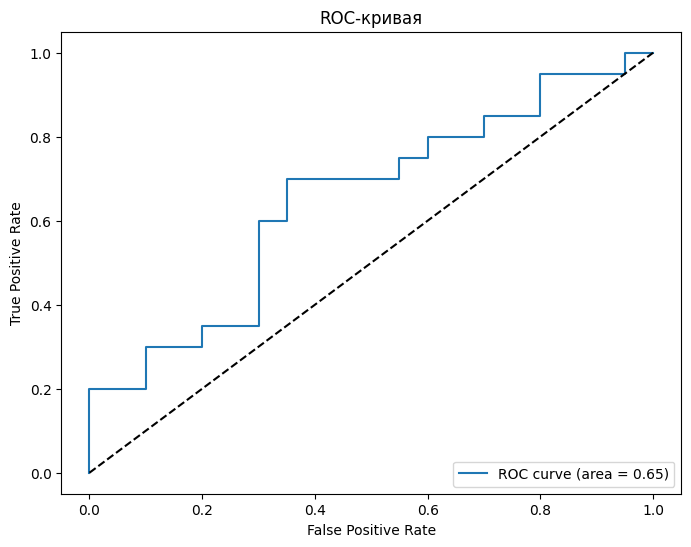

In [ ]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---